# Capital Asset Pricing Model 
# Manning LiveProjects
## Video 1: Getting Data

### Install libraries to collect data

### A reminder to encode your API keys for easy access

In [9]:
fedkey = '3ad5sfad5f4adf4a65sd4fads4f56ds4af8d'
quandlkey = 'pjgias-0j29s8dcnzpui128dkpa'

## Libraries you should already have

### <b>pandas</b>: General use data-wrangling and analysis

### <b>numpy</b>: vector arithmetic

### <b>datetime</b>: utility methods for using time series data

### <b>matplotlib</b>: common graphical library

### <b>seaborn</b>: graphical library with an easier interface

## Libraries to use

In [3]:
## Data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Data source
import yfinance as yf
from fredapi import Fred
import quandl as q

print("I've imported all libraries")

I've imported all libraries


## Getting yfinance data

In [ ]:
### Stock ticker 

stockseries = yf.download(
    tickers      # <-- symbol
    start        # <-- earliest date
    end          # <-- latest date
    interval     # <-- period of interest
                        )

In [4]:
### Declare parameters to simplify call
tickers= '^GSPC T VZ AAPL GOOG'
_interval = '1d'      ### One day at a time, other options '1h' '1m'
_start = '2023-06-01' ### Earliest date in range
_end   = '2024-05-31' ### Latest date in range

allstock = yf.download(tickers, 
                       start=_start, 
                       end=_end, 
                       interval=_interval)

[*********************100%%**********************]  5 of 5 completed


In [5]:
allstock['Close'].head()

Ticker,AAPL,GOOG,T,VZ,^GSPC
Date,,,,,
2023-06-01,180.089996,124.370003,15.81,35.720001,4221.020020
2023-06-02,180.949997,125.230003,15.21,34.580002,4282.370117
2023-06-05,179.580002,126.629997,15.39,34.459999,4273.790039
2023-06-06,179.210007,127.910004,15.67,34.700001,4283.850098
2023-06-07,177.820007,122.940002,16.10,35.259998,4267.520020


In [6]:
allstock['Open'].head()

Ticker,AAPL,GOOG,T,VZ,^GSPC
Date,,,,,
2023-06-01,177.699997,123.500000,15.75,35.599998,4183.029785
2023-06-02,181.029999,124.489998,15.08,34.400002,4241.009766
2023-06-05,182.630005,124.610001,15.33,34.779999,4282.990234
2023-06-06,179.970001,126.599998,15.46,34.500000,4271.339844
2023-06-07,178.440002,127.574997,15.63,34.720001,4285.470215


### Evaluate Closing Data

In [7]:
## Create a closing data dataframe
all_close = allstock['Close']

## Remove special character
all_close = all_close.rename({'^GSPC':'GSPC'}, axis=1)
all_close.tail()

Ticker,AAPL,GOOG,T,VZ,GSPC
Date,,,,,
2024-05-23,186.880005,175.059998,17.469999,39.430000,5267.839844
2024-05-24,189.979996,176.330002,17.500000,39.740002,5304.720215
2024-05-28,189.990005,178.020004,17.270000,39.360001,5306.040039
2024-05-29,190.289993,177.399994,17.120001,39.099998,5266.950195
2024-05-30,191.289993,173.559998,17.620001,40.330002,5235.479980


### Visualize Closing Data

### use matplotlib 
plt.... plotting class
### use one time for each stock ticker in tickers list
<br>plt.figure    <-- what size
<br>plt.subplot   <-- declare a subplot
<br>plt.plot      <-- draw the chart, defaults to line for our data
<br>plt.title     <-- give title
<br>plt.ylabel, xlabel <-- label axes

### Visualize Time Series

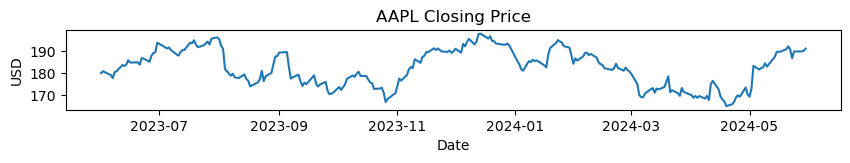

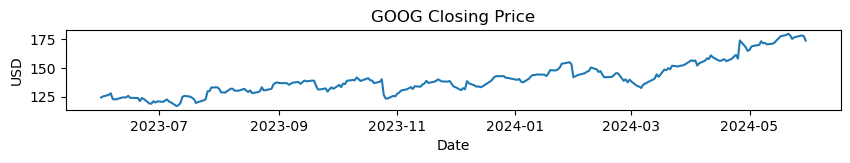

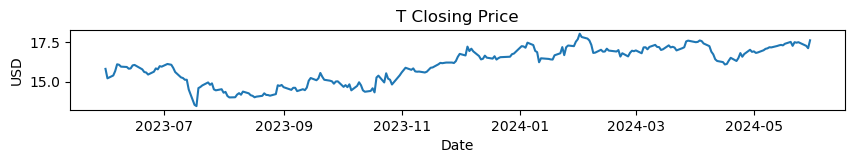

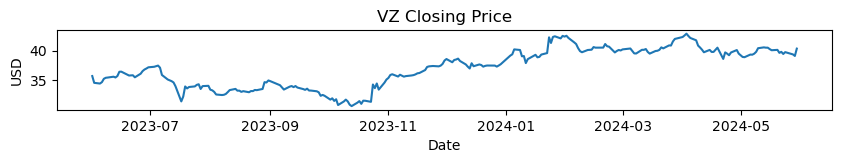

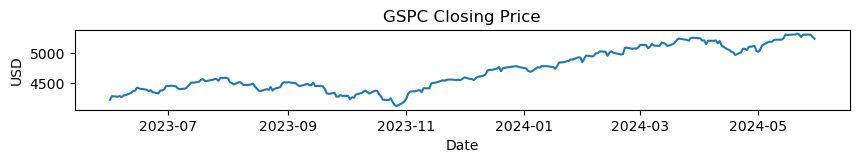

In [9]:
for i in range(len(all_close.columns)):
    plt.figure(figsize=(10,6))
    plt.subplot(len(all_close.columns),1,2)
    plt.plot(all_close.loc[:,all_close.columns[i]])
    plt.title(all_close.columns[i]+' Closing Price')
    plt.ylabel('USD')
    plt.xlabel('Date')
plt.show()

### Shorten the number of series shown

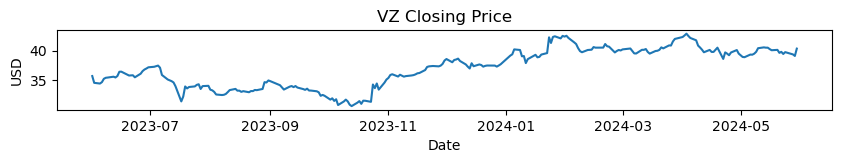

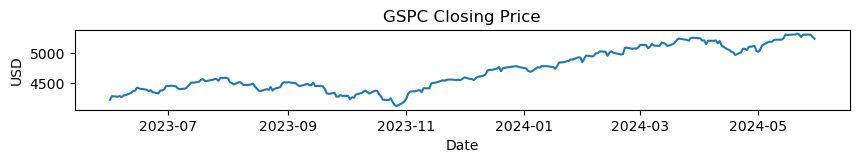

In [10]:
### More than I can visualize, just show last 2
for i in range(3,len(all_close.columns),1):
    plt.figure(figsize=(10,6))
    plt.subplot(len(all_close.columns),1,i+1)
    plt.plot(all_close.loc[:,all_close.columns[i]])
    plt.title(all_close.columns[i]+' Closing Price')
    plt.ylabel('USD')
    plt.xlabel('Date')
plt.show()

### Assets moving together

In [33]:
### Do these assets move together?
### Look at correlation
all_close.corr()

Ticker,AAPL,GOOG,T,VZ,GSPC
Ticker,,,,,
AAPL,1.000000,-0.128974,0.047912,0.028188,-0.070367
GOOG,-0.128974,1.000000,0.609389,0.608835,0.807325
T,0.047912,0.609389,1.000000,0.934837,0.779224
VZ,0.028188,0.608835,0.934837,1.000000,0.848866
GSPC,-0.070367,0.807325,0.779224,0.848866,1.000000


### Correlation Plot

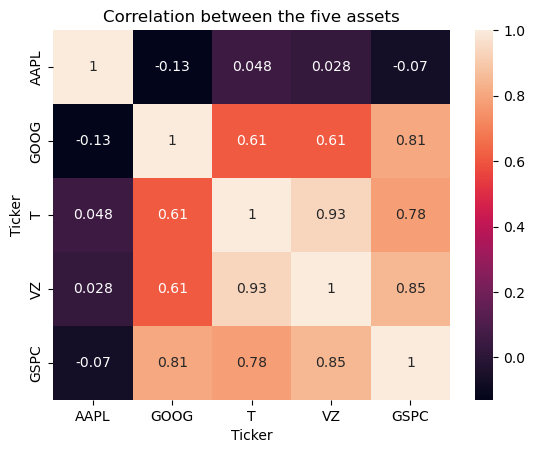

In [32]:
### Helpful heat map
heat_corr=all_close.corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation between the five assets")
plt.show()

---

### FRED API - Risk-Free Rate

In [1]:
## Remember to persist your key!
fedkey = '3ad5sfad5f4adf4a65sd4fads4f56ds4af8d'

In [6]:
### Getting FRED data

fred = Fred(api_key=fedkey)          ## Simple Call
interest=fred.get_series('FEDFUNDS') ## Name of Series
print(type(interest))
print(interest.tail())

<class 'pandas.core.series.Series'>
2024-03-01    5.33
2024-04-01    5.33
2024-05-01    5.33
2024-06-01    5.33
2024-07-01    5.33
dtype: float64


--

In [13]:
### Look at FRED's inventory of time series data
frf = fred.search('risk free')        ### FRED method for searching

frf[frf['frequency']==("Daily")]\
[['id','title','observation_start','observation_end','frequency','units']]\
.head(1)

,id,title,observation_start,observation_end,frequency,units
series id,,,,,,
DGS10,DGS10,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2024-08-15,Daily,Percent


---

### Options for Risk-Free rates

In [38]:
### We already declared all risk-free into frf
frf[frf['frequency']==("Daily")]\
[['id','observation_start','observation_end','frequency','units']]\
.head(4)

,id,observation_start,observation_end,frequency,units
series id,,,,,
DGS10,DGS10,1962-01-02,2024-08-15,Daily,Percent
DGS1,DGS1,1962-01-02,2024-08-15,Daily,Percent
DGS2,DGS2,1976-06-01,2024-08-15,Daily,Percent
DGS5,DGS5,1962-01-02,2024-08-15,Daily,Percent


<b><i>An important note</i></b>:

<b>DGS</b> series are Constant Maturity and <b>may be theoretical</b>.<br>
Why? The Treasury does not auction all maturities on a daily basis.<br>
We will use them to compare against daily stock returns.

In [15]:
### FRED API Call 

# myseries = fred.get_series(
#                             <STRING FOR NAME>
#                            , observation_start = <DATE>
#                            , observation_end = <DATE>
#                            )

### Parameterize to simplify my call
obs_start = '2023-07-01'
obs_end = '2024-06-01'

In [16]:
dgs1mo=fred.get_series('DGS1MO', observation_start=obs_start
                       , observation_end=obs_end )
dgs3mo=fred.get_series('DGS3MO', observation_start=obs_start
                       , observation_end=obs_end)
dgs6mo=fred.get_series('DGS6MO', observation_start=obs_start
                       , observation_end=obs_end)
dgs1yr=fred.get_series('DGS1', observation_start=obs_start
                       , observation_end=obs_end)
print("Data pulled from FRED")

Data pulled from FRED


In [17]:
dgs3mo.head()

2023-07-03    5.44
2023-07-04     NaN
2023-07-05    5.44
2023-07-06    5.46
2023-07-07    5.46
dtype: float64

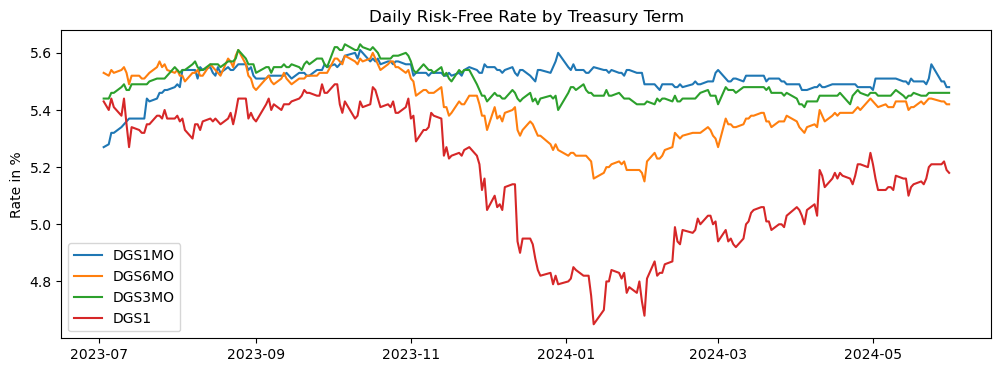

In [18]:
# Combine the four series
fed_df = pd.DataFrame({
    'DGS1MO': dgs1mo,
    'DGS6MO': dgs6mo,
    'DGS3MO': dgs3mo,
    'DGS1': dgs1yr
})

# Plot the combined series as four line plots
plt.figure(figsize=(12, 4))
sns.lineplot(data=fed_df, dashes=False, markers=False)
plt.ylabel('Rate in %')
plt.title('Daily Risk-Free Rate by Treasury Term')
plt.show()

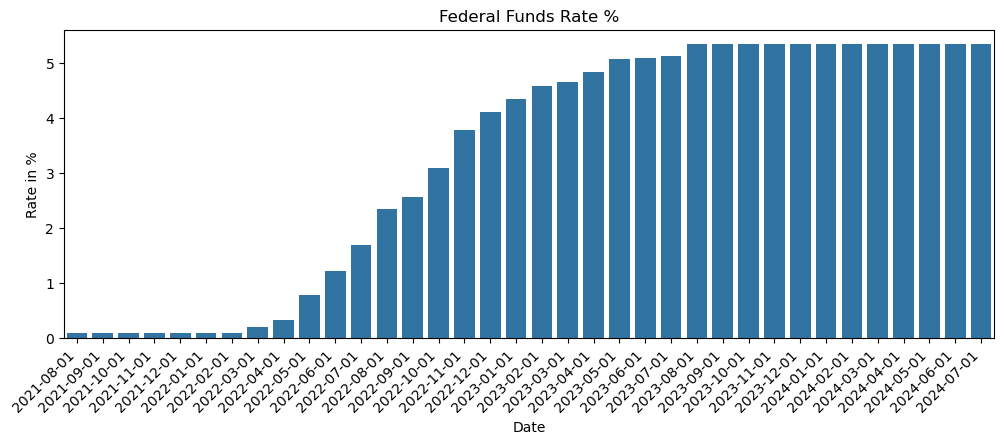

In [19]:
### Plot Federal Funds Rate
plt.figure(figsize=(12,4))
sns.barplot(interest.loc['2021-08-01':'2024-07-01'])  ## Slicer to get only 3 years
plt.title('Federal Funds Rate %')
plt.ylabel('Rate in %')
plt.xlabel('Date', loc='center')
plt.xticks(rotation=45, ha='right')  ## Rotate x-label for readability
plt.show()

### What is the relationship between treasury rates and fed funds rate?

In [39]:
### What can we know about the fedfunds rate?
fedfunds = fred.search('fedfunds')        ### FRED method for searching
fred.search('fedfunds')[['id','observation_end','frequency']]

,id,observation_end,frequency
series id,,,
FEDFUNDS,FEDFUNDS,2024-07-01,Monthly


### Do we have a similar risk-free daily average?

In [42]:
frf[(frf['frequency']==("Monthly"))
    & frf['title'].str.contains("Month")]\
[['id','title','observation_end','frequency']]\
.head(20)

,id,title,observation_end,frequency
series id,,,,
GS3M,GS3M,Market Yield on U.S. Treasury Securities at 3-...,2024-07-01,Monthly
GS1M,GS1M,Market Yield on U.S. Treasury Securities at 1-...,2024-07-01,Monthly
GS6M,GS6M,Market Yield on U.S. Treasury Securities at 6-...,2024-07-01,Monthly


### Plot both together

In [8]:
month_start = '2021-08-01'
month_end = '2024-07-01'
## Get data
fedfunds=fred.get_series('FEDFUNDS', observation_start=month_start
                            , observation_end=month_end)
gs3m=fred.get_series('GS3M', observation_start=month_start
                       , observation_end=month_end)
## Combine data
month_df = pd.DataFrame({
    'FEDFUNDS': fedfunds,
    '3MOTREAS': gs3m
})

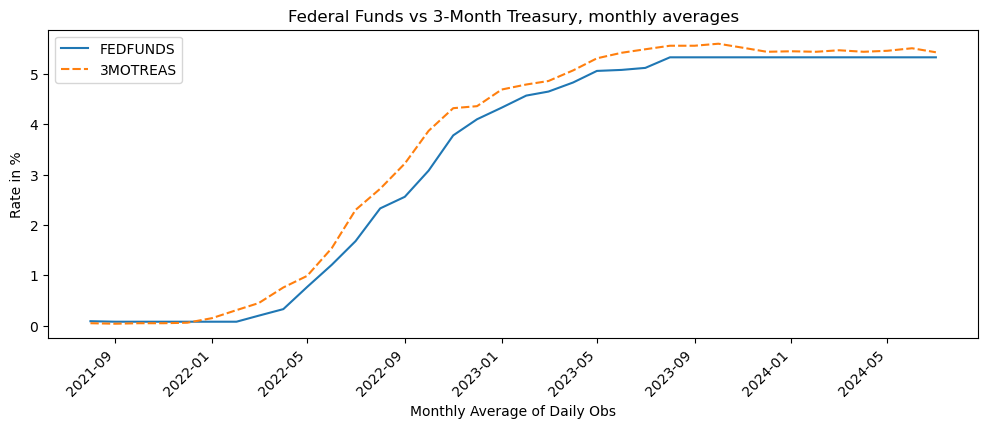

In [9]:
## Combine plots
plt.figure(figsize=(12,4))
sns.lineplot(month_df)
plt.title('Federal Funds vs 3-Month Treasury, monthly averages')
plt.ylabel('Rate in %')
plt.xlabel('Monthly Average of Daily Obs', loc='center')
plt.xticks(rotation=45, ha='right')  ## Rotate x-label for readability
plt.show()

### QUANDL API - Asset Prices

In [26]:
# quandl is aliased as q
oil=q.get("NSE/OIL", api_key=quandlkey
          , start_date="2010-01-01"
          , end_date="2024-06-01")
oil.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-01-04,1259.90,1259.9,1235.00,1242.5,1240.30,41769.0,519.53
2010-01-05,1259.55,1265.0,1237.05,1249.9,1250.55,129799.0,1616.00
2010-01-06,1255.10,1268.0,1242.50,1250.0,1248.80,63129.0,790.45
2010-01-07,1246.10,1255.0,1231.30,1241.5,1241.40,36209.0,451.02
2010-01-08,1248.90,1268.0,1230.00,1265.0,1262.95,64337.0,807.72


## End Milestone 1

### Next up ... using the data we collect